1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0


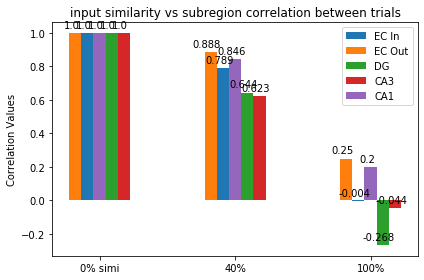

In [64]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

# start off by reading in values from CSV
# df = pd.read_csv('../100%/session_100percent.csv')
# df = pd.read_csv('../40%/session_40percent.csv')
df = pd.read_csv('../0%/session_0percent.csv')

df_rows = df[df.columns[0]].count()
# print(df_rows)
# print(df[:df_rows])

# extract sub-regions into 2D arrays [[trial1], [trial2], ...]
ec_in = []
ec_out = []
dg = []
ca3 = []
ca1 = []

allvals = df.to_numpy()
for i in range(df_rows):
    curr_row = allvals[i]
    ec_in.append(curr_row[4:148])
    ec_out.append(curr_row[149:293])
    dg.append(curr_row[294:919])
    ca3.append(curr_row[920:1220])
    ca1.append(curr_row[1221:1710])

# ec_in_r, ec_in_p = scipy.stats.pearsonr(ec_in[0], ec_in[1])
# ec_out_r, ec_out_p = scipy.stats.pearsonr(ec_out[0], ec_out[1])
# dg_r, dg_p = scipy.stats.pearsonr(dg[0], dg[1])
# ca3_r, ca3_p = scipy.stats.pearsonr(ca3[0], ca3[1])
# ca1_r, ca1_p = scipy.stats.pearsonr(ca1[0], ca1[1])

ec_in_r, ec_in_p = scipy.stats.spearmanr(ec_in[0], ec_in[1])
ec_out_r, ec_out_p = scipy.stats.spearmanr(ec_out[0], ec_out[1])
dg_r, dg_p = scipy.stats.spearmanr(dg[0], dg[1])
ca3_r, ca3_p = scipy.stats.spearmanr(ca3[0], ca3[1])
ca1_r, ca1_p = scipy.stats.spearmanr(ca1[0], ca1[1])
print(ec_in_r, ec_in_p)
print(ec_out_r, ec_out_p)
print(dg_r, dg_p)
print(ca3_r, ca3_p)
print(ca1_r, ca1_p)


# correlation_coefficients_0 = [1.0, 0.999, 1.0, 0.999, 0.999]
# correlation_coefficients_40 = [0.625, 0.760, 0.666, 0.856, 0.726]
# # high p-values!!
# correlation_coefficients_100 = [-0.275, 0.136, -0.020, -0.046, 0.137]

correlation_coefficients_0 = [1.0, 1.0, 1.0, 1.0, 1.0]
correlation_coefficients_40 = [0.789, 0.888, 0.644, 0.623, 0.846]
# high p-values!!
correlation_coefficients_100 = [-0.004, 0.250, -0.268, -0.044, 0.200]

labels = ['0% simi', '40%', '100%']
ec_in_corrs = [correlation_coefficients_0[0], correlation_coefficients_40[0], correlation_coefficients_100[0]]
ec_out_corrs = [correlation_coefficients_0[1], correlation_coefficients_40[1], correlation_coefficients_100[1]]
dg_corrs = [correlation_coefficients_0[2], correlation_coefficients_40[2], correlation_coefficients_100[2]]
ca3_corrs = [correlation_coefficients_0[3], correlation_coefficients_40[3], correlation_coefficients_100[3]]
ca1_corrs = [correlation_coefficients_0[4], correlation_coefficients_40[4], correlation_coefficients_100[4]]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, ec_in_corrs, width/5, label='EC In')
rects2 = ax.bar(x - (2*width)/5, ec_out_corrs, width/5, label='EC Out')
rects3 = ax.bar(x + (width)/5, dg_corrs, width/5, label='DG')
rects4 = ax.bar(x + (2*width)/5, ca3_corrs, width/5, label='CA3')
rects5 = ax.bar(x, ca1_corrs, width/5, label='CA1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation Values')
ax.set_title('input similarity vs subregion correlation between trials')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 5, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

# plt.show()